<a href="https://colab.research.google.com/github/fookseng/LSTM/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import datetime
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from google.colab import drive
from google.colab.patches import cv2_imshow # for image display


In [2]:
print(tf.__version__)

2.6.0


In [3]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
path = '/content/gdrive/Shareddrives/namr - water quality forecast/1005data_OutletOnly(8x12)/CHL/continuous_for_3'
savePath = '/content/gdrive/Shareddrives/namr - water quality forecast/fs/' #result/'


Part 1: Load data and save as pandas format

In [5]:
images_T2 = np.load(path +'/image_array_0.npy')
images_T1 = np.load(path +'/image_array_1.npy')
images_T = np.load(path +'/image_array_2.npy')
flow_T2 = np.load(path +'/flow_array_0.npy')
flow_T1 = np.load(path +'/flow_array_1.npy')
flow_T = np.load(path +'/flow_array_2.npy')
tide_T2 = np.load(path +'/delta_tide_array_0.npy')
tide_T1 = np.load(path +'/delta_tide_array_1.npy')
tide_T = np.load(path +'/delta_tide_array_2.npy')

print(images_T2.size, images_T2.shape)
print(images_T1.size, images_T1.shape)
print(images_T.size, images_T.shape)
print(flow_T2.size, flow_T2.shape)
print(flow_T1.size, flow_T1.shape)
print(flow_T.size, flow_T.shape)
print(tide_T2.size, tide_T2.shape)
print(tide_T1.size, tide_T1.shape)
print(tide_T.size, tide_T.shape)

107520 (1120, 12, 8)
107520 (1120, 12, 8)
107520 (1120, 12, 8)
1120 (1120, 1)
1120 (1120, 1)
1120 (1120, 1)
1120 (1120, 1)
1120 (1120, 1)
1120 (1120, 1)


In [6]:
cv2_imshow(images_T2[6])
print(images_T2[6])

[[1.745519   1.8057764  1.7642915  1.6759112  1.4041015  0.4991049
  0.39641532 0.37551555]
 [1.7507998  1.7084353  1.6732614  1.6836575  1.5288602  0.4700635
  0.4296165  0.40607464]
 [1.7767072  1.617772   1.523569   1.5945204  0.6378101  0.42028487
  0.43850937 0.40104958]
 [1.9499776  1.5980276  1.5553278  1.5296769  0.7351361  0.4390112
  0.4281676  0.40872622]
 [2.4692879  1.6215789  1.5400419  1.3872281  0.85543054 0.44990203
  0.4173538  0.40021747]
 [0.         1.8670131  1.5280848  1.3726594  0.8367963  0.60796523
  0.5980635  0.5072158 ]
 [0.         1.8630258  1.6384112  1.3458747  0.99817777 0.61376464
  0.49818084 0.5206232 ]
 [0.         1.9057868  1.8507142  1.5296738  1.3943865  0.9416087
  0.8894353  0.90924096]
 [0.         1.8606178  1.7946365  1.8098979  1.393217   1.1273388
  1.0676686  0.95277333]
 [0.         2.0411196  1.872856   1.7949772  1.3748311  1.1283436
  1.0513139  1.0247725 ]
 [3.8450255  2.143023   1.9224033  1.9541906  1.8717319  1.1876802
  1.03811

In [7]:
pixel_value_T2 = []
pixel_value_T1 = []
pixel_value_T = []
pattern_data = []
flow_data = []
tide_data = []
def createData(x, y):
    print("Creating dataset on point:", x,",", y)
    for i in range(1120):
        pixel_value_T2.append(images_T2[i][x][y])
        pixel_value_T1.append(images_T1[i][x][y])
        pixel_value_T.append(images_T[i][x][y])
        pattern_data.append(images_T2[i][x][y])
        pattern_data.append(images_T1[i][x][y])
        pattern_data.append(images_T[i][x][y])
        flow_data.append(flow_T2[i][0])
        flow_data.append(flow_T1[i][0])
        flow_data.append(flow_T[i][0])
        tide_data.append(tide_T2[i][0])
        tide_data.append(tide_T1[i][0])
        tide_data.append(tide_T[i][0])


In [8]:
createData(5, 6)
x = {'pixel': pattern_data, 'flow': flow_data, 'tide': tide_data}
df = pd.DataFrame(x)
print(df)

Creating dataset on point: 5 , 6
         pixel   flow      tide
0     0.507416  29.31 -3.230000
1     0.478374  30.34 -3.186667
2     0.555165  30.34 -2.650000
3     0.478374  30.34 -3.186667
4     0.555165  30.34 -2.650000
...        ...    ...       ...
3355  0.684679  35.45  1.686667
3356  0.956754  35.45  1.903333
3357  0.684679  35.45  1.686667
3358  0.956754  35.45  1.903333
3359  1.624788  35.45  1.880000

[3360 rows x 3 columns]


Part 2: Observe statistics and frequency of dataset.

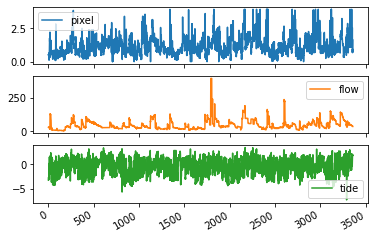

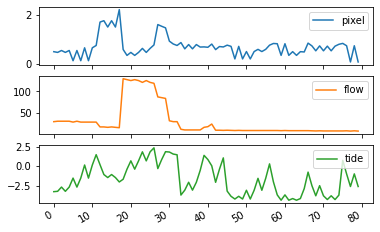

In [11]:
plot_cols = ['pixel', 'flow', 'tide']
plot_features = df[plot_cols]
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:80]
_ = plot_features.plot(subplots=True)

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pixel,3360.0,1.160091,0.626616,0.00,0.726032,1.041855,1.471410,3.928302
flow,3360.0,46.089810,38.501225,3.30,23.420000,34.660000,56.900000,393.040000
tide,3360.0,-0.720370,1.766859,-7.28,-2.156667,-0.720000,0.816667,3.393333


Part 3: Split the data (7:2:1 == 784:224:112)

In [23]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]
print(train_df)
print(val_df)
print(test_df)

         pixel   flow      tide
0     0.507416  29.31 -3.230000
1     0.478374  30.34 -3.186667
2     0.555165  30.34 -2.650000
3     0.478374  30.34 -3.186667
4     0.555165  30.34 -2.650000
...        ...    ...       ...
2347  1.007324  28.09 -1.580000
2348  1.241010  28.09 -0.896667
2349  1.522529  28.09 -1.030000
2350  1.238465  28.09 -1.876667
2351  1.308782  26.65 -1.923333

[2352 rows x 3 columns]
         pixel   flow      tide
2352  1.238465  28.09 -1.876667
2353  1.308782  26.65 -1.923333
2354  1.352989  26.65 -1.456667
2355  0.731646  15.84  0.026667
2356  0.615044  15.84 -1.123333
...        ...    ...       ...
3019  0.702669  40.52  1.246667
3020  0.629381  39.46  0.613333
3021  0.702669  40.52  1.246667
3022  0.629381  39.46  0.613333
3023  1.004864  39.46  0.093333

[672 rows x 3 columns]
         pixel   flow      tide
3024  0.629381  39.46  0.613333
3025  1.004864  39.46  0.093333
3026  0.803503  39.46 -0.716667
3027  1.203791  35.33 -0.246667
3028  0.832991  34.37  